In [27]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [28]:
# Read the data
df = pd.read_csv("healthcare_dataset.csv")
df 


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [29]:
df.info()

df.describe()

df.isnull().sum()

df.nunique() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

Data Wrangling

In [30]:
# Clean the data with some na values or fill age with 
df_clean = df.dropna() 

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Age']

0        30
1        62
2        76
3        28
4        43
         ..
55495    42
55496    61
55497    38
55498    43
55499    53
Name: Age, Length: 55500, dtype: int64

In [31]:
# Reformat the name of Patients
df['Name'] = df['Name'].str.title() 
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [32]:
# Drop unnecessary column
df = df.drop(columns=['Room Number'])

In [33]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime objects
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Length of stay in hospital
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Check it after update new column of length of stay
df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head()

,Date of Admission,Discharge Date,Length of Stay
0,2024-01-31,2024-02-02,2
1,2019-08-20,2019-08-26,6
2,2022-09-22,2022-10-07,15
3,2020-11-18,2020-12-18,30
4,2022-09-19,2022-10-09,20


In [ ]:
# Check if some billing have Negative amount not true 
# 
df = df[df['Billing Amount'] >= 0]

Data Aggregation 

Find most expensive hospital following by the medication, length of stay and insurance

In [ ]:

# Group by Hospital, Insurance Provider, and Medication and aggregate metrics
grouped = df.groupby(['Hospital', 'Insurance Provider', 'Medication']).agg({
    'Length of Stay': 'mean',
    'Billing Amount': ['mean', 'sum', 'count']
})

# Flatten MultiIndex columns
grouped.columns = ['Avg Length of Stay', 'Avg Billing', 'Total Billing', 'Patient Count']
grouped = grouped.reset_index()

# Sort by average billing to get the most expensive
most_expensive_stays = grouped.sort_values(by='Avg Billing', ascending=False) # highest to lowest

# Display top 10
most_expensive_stays.head(10)


,Hospital,Insurance Provider,Medication,Avg Length of Stay,Avg Billing,Total Billing,Patient Count
14782,Hernandez-Morton,UnitedHealthcare,Penicillin,14.0,52373.032374,104746.064748,2
37228,Sons and Bailey,Blue Cross,Ibuprofen,9.0,52271.663747,52271.663747,1
26086,Miller Ltd,Aetna,Paracetamol,1.0,52211.852966,52211.852966,1
29274,PLC Garner,Aetna,Penicillin,7.0,52181.837792,52181.837792,1
40384,Walker-Garcia,Cigna,Penicillin,2.0,52170.036854,104340.073707,2
34288,Ruiz-Anthony,UnitedHealthcare,Aspirin,23.0,52154.237722,52154.237722,1
10551,George-Gonzalez,Cigna,Ibuprofen,9.0,52102.240889,52102.240889,1
33494,Rocha-Carter,Medicare,Aspirin,2.0,52092.669896,52092.669896,1
3158,"Briggs Walker Martinez, and",Cigna,Penicillin,26.0,52024.726443,52024.726443,1
37001,Sons Little and,Medicare,Aspirin,21.0,51986.084462,51986.084462,1


C:\Users\vdang\AppData\Local\Temp\ipykernel_16432\1105252819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['Label'] = top10['Hospital'] + ' | ' + top10['Insurance Provider'] + ' | ' + top10['Medication']
C:\Users\vdang\AppData\Local\Temp\ipykernel_16432\1105252819.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='Avg Billing', y='Label', palette='rocket')


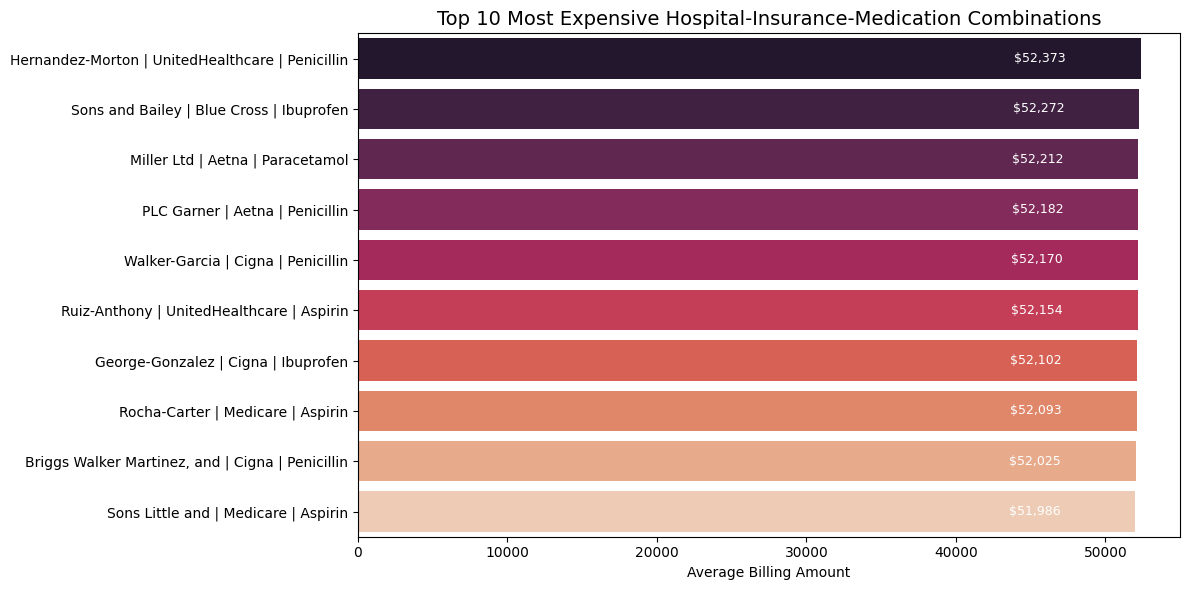

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Take top 10
top10 = most_expensive_stays.head(10)
# Creat combination label to display the amount of using hospital care
top10['Label'] = top10['Hospital'] + ' | ' + top10['Insurance Provider'] + ' | ' + top10['Medication']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10, x='Avg Billing', y='Label', palette='rocket')

# Add billing amount labels to bars
for i, (value, label) in enumerate(zip(top10['Avg Billing'], top10['Label'])):
    ax.text(value - 5000, i, f"${value:,.0f}", va='center', ha='right', color='white', fontsize=9)

# Style
plt.title("Top 10 Most Expensive Hospital-Insurance-Medication Combinations", fontsize=14)
plt.xlabel("Average Billing Amount")
plt.ylabel("")
plt.tight_layout()
plt.show()


Determine the test result based on the medication type 

In [66]:
group_counts = df.groupby(['Blood Type', 'Medical Condition', 'Medication']).size().reset_index(name='count')
print(group_counts.sort_values(by='count', ascending=False).head(10))


def map_status(row):
    if row['Test Results'] == 'Abnormal':
        return 1
    
    elif row['Test Results'] == 'Inconclusive':
        return 2
    else:
        return 0


df['Test Status'] = df.apply(map_status, axis=1)
# group by and get proportion of "Abnormal" results:
df['Is Abnormal'] = df['Test Status'] == 1
summary = df.groupby(['Blood Type', 'Medical Condition', 'Medication'])['Is Abnormal'].agg(['mean', 'count']).reset_index()

# Rename the 'mean' column to 'Abnormal Rate'
summary.rename(columns={'mean': 'Abnormal Rate'}, inplace=True)

# Filter groups with at least 5 samples
summary = summary[summary['count'] >= 10]


print (f"--------- Abnormal Rate ---------")
print(summary.sort_values(by='Abnormal Rate', ascending=False).head(10))



    Blood Type Medical Condition   Medication  count
132         B+            Cancer      Lipitor    274
38          A-            Asthma  Paracetamol    272
231         O-      Hypertension    Ibuprofen    263
23          A+      Hypertension  Paracetamol    263
50          A-      Hypertension      Aspirin    261
167         B-          Diabetes      Lipitor    260
15          A+          Diabetes      Aspirin    259
179         B-           Obesity   Penicillin    258
222         O-            Cancer      Lipitor    256
170         B-      Hypertension      Aspirin    256
--------- Abnormal Rate ---------
    Blood Type Medical Condition   Medication  Abnormal Rate  count
196         O+          Diabetes    Ibuprofen       0.411765    255
47          A-          Diabetes      Lipitor       0.407407    243
41          A-            Cancer    Ibuprofen       0.401709    234
124         B+         Arthritis   Penicillin       0.399177    243
92         AB-         Arthritis      Lipit

In [61]:
print(df['Test Results'].unique())

['Normal' 'Inconclusive' 'Abnormal']


C:\Users\vdang\AppData\Local\Temp\ipykernel_16432\2530798927.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=subset, x='Medication', y='Is Abnormal', ci=None)


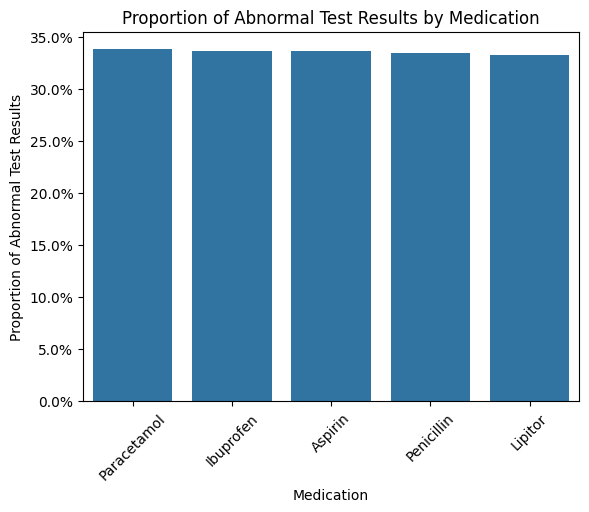

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

top_meds = df['Medication'].value_counts().nlargest(10).index
subset = df[df['Medication'].isin(top_meds)]

sns.barplot(data=subset, x='Medication', y='Is Abnormal', ci=None)
plt.title("Proportion of Abnormal Test Results by Medication")
plt.ylabel("Proportion of Abnormal Test Results")
# Use percentage to improve the plot
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=45)
plt.show()


In [72]:
# Inconclusive 
df['Is Inconclusive'] = df['Test Status'] == 2
summary = df.groupby(['Blood Type', 'Medical Condition', 'Medication'])['Is Conclusive'].agg(['mean', 'count']).reset_index()

# Rename the 'mean' column to 'Abnormal Rate'
summary.rename(columns={'mean': 'Inconclusive Rate'}, inplace=True)
summary = summary[summary['count'] >= 10]

# Sort by abnormal rate descending and show top 10
print (f"--------- Inconclusive Rate ---------")
print(summary.sort_values(by='Inconclusive Rate', ascending=False).head(10))




--------- Inconclusive Rate ---------
    Blood Type Medical Condition   Medication  Inconclusive Rate  count
57          A-           Obesity      Lipitor           0.417355    242
51          A-      Hypertension    Ibuprofen           0.408696    230
71         AB+            Cancer    Ibuprofen           0.396552    232
42          A-            Cancer      Lipitor           0.396135    207
112        AB-      Hypertension      Lipitor           0.396135    207
73         AB+            Cancer  Paracetamol           0.390041    241
9           A+            Asthma   Penicillin           0.384259    216
121         B+         Arthritis    Ibuprofen           0.384000    250
28          A+           Obesity  Paracetamol           0.382883    222
120         B+         Arthritis      Aspirin           0.380531    226


C:\Users\vdang\AppData\Local\Temp\ipykernel_16432\1979828551.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=subset, x='Medication', y='Is Conclusive', ci=None)


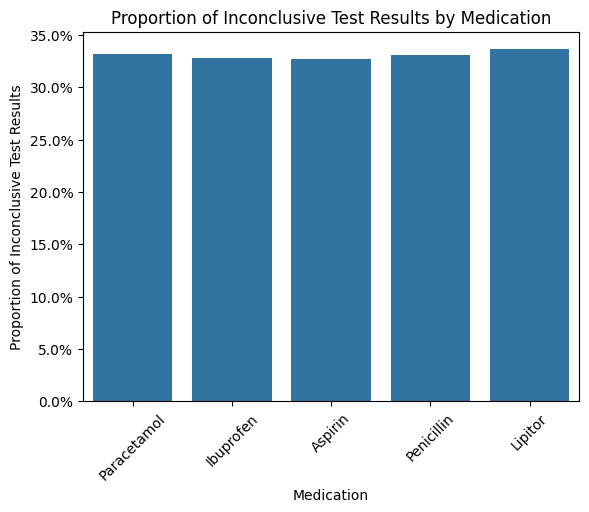

In [77]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

top_meds = df['Medication'].value_counts().nlargest(10).index
subset = df[df['Medication'].isin(top_meds)]

sns.barplot(data=subset, x='Medication', y='Is Conclusive', ci=None)
plt.title("Proportion of Inconclusive Test Results by Medication")
plt.ylabel("Proportion of Inconclusive Test Results")
# Use percentage to improve the plot
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=45)
plt.show()

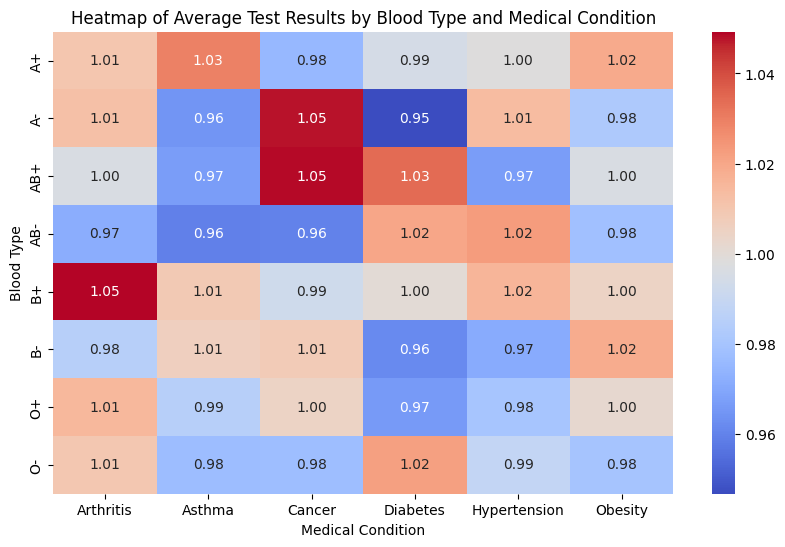

In [15]:
# Pivot the data to create matrix for heatmap
pivot_table = summary.pivot_table(index='Blood Type', columns='Medical Condition', values='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Heatmap of Average Test Results by Blood Type and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Type')
plt.show()